# CBMS Data Cleaning and Visualization Machine Project
## Do environmental conditions (water source and garbage collection frequency) in Pasay related to the residents contracting diseases in 2011?
DATASCI S14<br>
**Lim, Ivana Koon Yee U.<br>
Rodriguez, Jean Noelle L.**

For this notebook, we will be cleaning data from the Community-Based Monitoring System (CBMS).

The CBMS data aims to design and pilot community-based systems for monitoring poverty in its multidimensional sense. It is one of the tools developed in the early 1990s to provide policymakers and program implementers with a good information base for tracking the impacts of macroeconomic reforms and various policy shocks.

The indicators that we will be using are as follows:

- water source (source_water)
- frequency of garbage collection (garb_collect)
- illness (gsick)

Firstly, the libraries needed for data cleaning needs to be imported:

In [0]:
import pandas as pd
import numpy as np
import os
import plotly.graph_objs as go

## Loading File

For this notebook, we will be using the pasay city data of 2011. The household (hh) file contains the columns for the water source, garbage collection frequency, and illness, so we will load the hh file.

In [0]:
# IF USING ANACONDA NAVIGATOR JUPYTER NOTEBOOK
# df = pd.read_csv("../pasay_compressed/Pasay_2011_csv/hpq_hh.csv", encoding="latin-1")

# FOR COLAB NOTEBOOKS
from google.colab import drive
drive.mount('/gdrive')
import glob

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
file_path = "/gdrive/My Drive/DATASCI/pasay_compressed/Pasay_2011_csv/hpq_hh.csv"

In [0]:
df = pd.read_csv(file_path, encoding="latin-1")
df.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (11,13,50,55,57,58,61,63,72,138,140,141,142,143,144,145,146,147,148,150,153,163,165,167,202,203,204,205,206,208,209,211,212,213,214,215,222,231) have mixed types. Specify dtype option on import or set low_memory=False.



,urb,regn,prov,mun,brgy,purok,hcn,zone,street,hnum,...,hwelec,hwtenur,ntmswall,ntmsroof,hntmsh,pci,povthresh,subthresh,hntpovp,hntsubp
0,Urban,13,76,5,1,99,20,1,CUYEGKING ST,1710,...,1,1,1,1,1,10600.000,19802,13831,0,0
1,Urban,13,76,5,1,99,29,1,MAYTUBIG ST,104,...,1,1,1,1,1,36966.668,19802,13831,1,1
2,Urban,13,76,5,1,99,50,1,CUYEGKING AT,1739,...,1,1,1,1,1,26300.000,19802,13831,1,1
3,Urban,13,76,5,1,99,57,1,CUYEGKING ST,1730,...,1,1,1,1,1,12250.000,19802,13831,0,0
4,Urban,13,76,5,1,99,66,1,CUYEGKING ST,479,...,1,1,1,1,1,32300.000,19802,13831,1,1
5,Urban,13,76,5,1,99,64,1,CUYEGKING,1710,...,1,1,1,1,1,14600.000,19802,13831,0,1
6,Urban,13,76,5,1,99,21,1,CUYEGKING ST,1719,...,1,1,1,1,1,22500.000,19802,13831,1,1
7,Urban,13,76,5,1,99,23,1,MAYTUBIG,1712,...,1,1,1,1,1,30000.000,19802,13831,1,1
8,Urban,13,76,5,1,99,25,1,MAYTUBIG ST,1712,...,1,1,1,1,1,60000.000,19802,13831,1,1
9,Urban,13,76,5,1,99,27,1,MAYTUBIG ST,104 COMPOUND,...,1,1,1,1,1,61500.000,19802,13831,1,1


We can see here that the 2011 hpq_hh file has a total of 70396 entries.

In [0]:
len(df)

70396

## Extracting columns into new dataframe

Next, the needed columns are extracted from the pasay city 2011 cbms data. A new dataframe is created to contain the columns extracted.

In [0]:
dfhh = pd.DataFrame()
dfhh["hcn"] = df["hcn"]
dfhh["brgy"] = df["brgy"]

dfhh["source_water"] = df["source_water"]
# dfhh["source_water_o"] = df["source_water_o"]

dfhh["freq_garb_coll"] = df["freq_garb_coll"]
# dfhh["garb_collect"] = df["garb_collect"]
# dfhh["garb_collector"] = df["garb_collector"]
# dfhh["garb_collector_o"] = df["garb_collector_o"]
# dfhh["freq_garb_coll_o"] = df["freq_garb_coll_o"]

dfhh["gsick"] = df["gsick"]
dfhh["s_pneumonia"] = df["s_pneumonia"]
dfhh["s_bronchitis"] = df["s_bronchitis"]
dfhh["s_diarrhea"] = df["s_diarrhea"]
dfhh["s_influenza"] = df["s_influenza"]
dfhh["s_hypertension"] = df["s_hypertension"]
dfhh["s_tuberculosis"] = df["s_tuberculosis"]
dfhh["s_heart_ailment"] = df["s_heart_ailment"]
dfhh["s_malaria"] = df["s_malaria"]
dfhh["s_chicken_pox"] = df["s_chicken_pox"]
dfhh["s_dengue_fever"] = df["s_dengue_fever"]
dfhh["s_cholera"] = df["s_cholera"]
dfhh["s_typhoid_fever"] = df["s_typhoid_fever"]
dfhh["s_heat_stroke"] = df["s_heat_stroke"]
dfhh["s_asthma"] = df["s_asthma"]
dfhh["other_sick"] = df["other_sick"]
dfhh["other_sick_lb"] = df["other_sick_lb"]

dfhh

,hcn,brgy,source_water,freq_garb_coll,gsick,s_pneumonia,s_bronchitis,s_diarrhea,s_influenza,s_hypertension,...,s_heart_ailment,s_malaria,s_chicken_pox,s_dengue_fever,s_cholera,s_typhoid_fever,s_heat_stroke,s_asthma,other_sick,other_sick_lb
0,20,1,Piped water to yard/plot,Daily,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29,1,Piped water into dwelling,Daily,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50,1,Piped water into dwelling,Daily,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,1,Piped water into dwelling,Daily,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66,1,Piped water to yard/plot,Daily,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,64,1,Piped water to yard/plot,Daily,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21,1,Piped water to yard/plot,Daily,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23,1,Piped water to yard/plot,Thrice a week,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,25,1,Piped water to yard/plot,Thrice a week,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,27,1,Piped water to yard/plot,Daily,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Familiarizing with the illness variable

Out of 70396 entries, 8684 of the households have reported of getting sick.

In [0]:
print("Number of households reported of getting sick: ", len(dfhh.loc[df["gsick"]=="Yes"]))

Number of households reported of getting sick:  8684


Aside from the illnesses, we will need to look into the garbage collection frequency and the water source columns to familiarize ourselves with the data.

## Familiarizing with the garbage collection frequency variable

Let us first check how many households have their garbages collected and how many households do not have their garbages collected. Let us also see how many null values are there for the column. If the null values are just a small number, then they can be dropped.

In [0]:
# check the values of garb_collect
print(df["garb_collect"].unique())

# how many households do not have their garbages collected
print("NO garb_coll: ", len(df.loc[df["garb_collect"]=="No"]))

# how many households have their garbages collected
print("YES garb_coll", len(df.loc[df["garb_collect"]=="Yes"]))

# how many null values in that column
print("Null: ", len(df.loc[df["garb_collect"].isnull()]))

['Yes' 'No' nan]
NO garb_coll:  1977
YES garb_coll 68412
Null:  7


So there are only 1,977 households that do not have their garbages collected as opposed to the 68,412 households that have their garbages collected. We can also see here that there are only 7 null entries which is not much of a problem and we can just drop the null rows later.

The categories for the frequency of garbage collection as defined in the data dictionary are as follows:

In [0]:
dfhh["freq_garb_coll"].unique()

array(['Daily', 'Thrice a week', 'Twice a week', 'Once a week', nan,
       'Other'], dtype=object)

Let us also check how many entries are there for each choice.

In [0]:
print(df["freq_garb_coll"].value_counts())

Daily            63607
Thrice a week     3012
Twice a week      1382
Once a week        376
Other               35
Name: freq_garb_coll, dtype: int64


We can see here that majority of the households have their garbages collected daily.

#### Others category

Also let us check how many households do not have their garbages collected according to the predefined set of values in the data dictionary for curiosity's sake.

In [0]:
# how many other frequency of garbage collection
len(df.loc[df["freq_garb_coll"] == "Other", "freq_garb_coll_o"])

35

So there are only 35 entries in the Others category. Let us see what are their values.

In [0]:
df.loc[df["freq_garb_coll"] == "Other", "freq_garb_coll_o"]

8705     EVERY OTHER DAY
12259                NaN
18301                NaN
33796                NaN
39623             4TIMES
39624                NaN
39628             4TIMES
39630             4TIMES
39634                NaN
39639             4TIMES
39646             4TIMES
39651                NaN
39652             4TIMES
39653             4TIMES
39657             4TIMES
39658             4 TIME
39659             4TIMES
39731             4TIMES
45985      APAT NA BESES
48725               WALA
49478      4TIMES A WEEK
53455                NaN
53481                  1
53527     MATAGAL DUMAAN
53528    KARITON EVRYDAY
53534    PRIVATE KARITON
53541                141
53772                141
53978    SA KARITON LANG
54012            PRIVATE
54016                NaN
55878     4 TIMES A WEEK
56640    SIX  TIMES/WEEK
56756       ONCE A MONTH
58683         1.4013e+06
Name: freq_garb_coll_o, dtype: object

Okay, so there are null values as well as other values not included in the data dictionary choices.

### Assign a number to each garbage collection frequency category

Next, we are going to add a new column in the dataframe that maps each category to a number for organization.

In [0]:
type_labels={
    "Daily": 1,
    "Thrice a week": 2,
    "Twice a week": 3,
    "Once a week": 4,
    "Other": 5,
}

# add new column for the mappings
dfhh["nFreq_garb_coll"] = dfhh["freq_garb_coll"].map(type_labels)

# if null assign -1
dfhh.loc[dfhh["nFreq_garb_coll"].isnull(), "nFreq_garb_coll"] = -1

# cast the new column to integer
dfhh["nFreq_garb_coll"] = dfhh["nFreq_garb_coll"].apply(lambda x: int(x))

In [0]:
dfhh["nFreq_garb_coll"].unique()

array([ 1,  2,  3,  4, -1,  5])

## Familiarizing with the water source variable

Next is to familiarize the water source data. Let us first check what unique categories of the source water are present, as defined in the data dictionary.

In [0]:
# check the values of source_water
print(df["source_water"].unique())

['Piped water to yard/plot' 'Piped water into dwelling'
 'Bottled/Mineral water' 'Others, specify _____' 'Public tap/stand pipe'
 'Tube well or borehole' 'Protected dug well'
 'Protected water from spring' nan 'Tanker truck'
 'Semi-protected dug well' 'Rainwater' 'Cart with small tank'
 'Surface water (River, Dam, etc.)' 'Unprotected dug well'
 'Unprotected water from spring']


That's quite a lot of choices! Let us also check how many entries are there for each choice.

In [0]:
print(df["source_water"].value_counts())

Piped water into dwelling           54399
Piped water to yard/plot             9852
Public tap/stand pipe                2286
Bottled/Mineral water                1476
Others, specify _____                 735
Tube well or borehole                 549
Protected dug well                    383
Cart with small tank                  344
Protected water from spring           129
Semi-protected dug well                74
Tanker truck                           67
Unprotected dug well                   54
Rainwater                              21
Surface water (River, Dam, etc.)       18
Unprotected water from spring           1
Name: source_water, dtype: int64


We can see here that majority of the households have their water source as piped water into dwelling. Let us also check if there are any null values and how many if any.

In [0]:
# how many null values in that column
print("Null: ", len(df.loc[df["source_water"].isnull()]))

Null:  8


#### Others category

Check also the values in the others category for curiosity's sake.

In [0]:
df.loc[~df["source_water_o"].isnull(), "source_water_o"]

139      igib sa kapitbahay
349                       0
366                       0
1788            NAKIKI IGIB
3723               nag-iisa
4634                depwell
5371                 boiled
6192                   poso
6379                      0
7934                      0
8680            unspecified
8696                   poso
8725                   poso
8735                   poso
8753                   poso
8755                   poso
8756                   poso
8757                   poso
8777                   poso
8802                   poso
8803                   poso
8804                   poso
8805                   poso
8848                   poso
8850                   poso
8851                   poso
8854                   poso
8868                   POSO
8879                   poso
8901                   poso
                ...        
60921               umiigig
60923               UMIIGIB
60930               UMIIGIB
60932              UMIIIGIB
60941              U

### Assign a number to each water source category

In [0]:
# assign a number for each type of water source for scatter plot later
type_labels={
    "Piped water into dwelling" : 1,
    "Piped water to yard/plot" : 2,
    "Public tap/stand pipe" : 3,
    "Tube well or borehole" : 4,
    "Protected dug well" : 5,
    "Semi-protected dug well" : 6,
    "Unprotected dug well" : 7,
    "Protected water from spring" : 8,
    "Unprotected water from spring" : 9,
    "Rainwater" : 10,
    "Tanker truck" : 11,
    "Cart with small tank" : 12,
    "Surface water (River, Dam, etc.)" : 13,
    "Bottled/Mineral water" : 14,
    "Others, specify _____" : 15
}

dfhh["nSource_water"] = dfhh["source_water"].map(type_labels)
dfhh.loc[dfhh["nSource_water"].isnull(), "nSource_water"] = -1
dfhh["nSource_water"] = dfhh["nSource_water"].apply(lambda x: int(x))

In [0]:
dfhh["nSource_water"].unique()

array([ 2,  1, 14, 15,  3,  4,  5,  8, -1, 11,  6, 10, 12, 13,  7,  9])

## Data Cleaning

Let us now proceed to the data cleaning propoer. So we only want to focus on the households that have reported getting sick in 2011 which has a total of 8684 entries.

In [0]:
# only get those that have reported getting sick
dfhh = dfhh.loc[dfhh["gsick"] == "Yes"]

# drop the column with the "Yes" value since all of it will be Yes anyway.
dfhh = dfhh.drop("gsick", axis=1)

dfhh

,hcn,brgy,source_water,freq_garb_coll,s_pneumonia,s_bronchitis,s_diarrhea,s_influenza,s_hypertension,s_tuberculosis,...,s_chicken_pox,s_dengue_fever,s_cholera,s_typhoid_fever,s_heat_stroke,s_asthma,other_sick,other_sick_lb,nFreq_garb_coll,nSource_water
170,101686,2,Piped water into dwelling,Daily,No,No,No,Yes,No,No,...,No,No,No,No,No,Yes,No,NaN,1,1
179,101695,2,Piped water into dwelling,Daily,Yes,No,No,No,Yes,No,...,No,No,No,No,No,No,No,NaN,1,1
194,101579,2,Piped water into dwelling,Daily,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,NaN,1,1
197,101582,2,Piped water to yard/plot,Daily,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,NaN,1,2
200,101585,2,Piped water to yard/plot,Daily,No,No,No,No,No,No,...,No,No,No,No,No,No,Yes,OVARIAN CANCER,1,2
210,101595,2,Piped water into dwelling,Daily,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,NaN,1,1
280,101627,2,Piped water into dwelling,Daily,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,NaN,1,1
297,101679,2,Piped water into dwelling,Daily,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,NaN,1,1
304,194,2,Piped water into dwelling,Daily,No,No,No,No,No,No,...,No,No,No,No,No,Yes,No,NaN,1,1
311,176,2,Piped water into dwelling,Daily,No,No,No,No,No,No,...,No,No,No,No,No,No,No,NaN,1,1


### Convert Sickness columns to row values

Taking a look of the columns now we have the following:

In [0]:
dfhh.columns

Index(['hcn', 'brgy', 'source_water', 'freq_garb_coll', 's_pneumonia',
       's_bronchitis', 's_diarrhea', 's_influenza', 's_hypertension',
       's_tuberculosis', 's_heart_ailment', 's_malaria', 's_chicken_pox',
       's_dengue_fever', 's_cholera', 's_typhoid_fever', 's_heat_stroke',
       's_asthma', 'other_sick', 'other_sick_lb', 'nFreq_garb_coll',
       'nSource_water'],
      dtype='object')

Since not all households reported that they got all of this diseases, there are consuming space-- having many No's for each type of illness. The illness category column can be stacked as rows, and we can do that using the stack() function, and renaming the new column as "sickness" instead.

In [0]:
dfstacked = dfhh.set_index(["hcn","brgy","source_water","nSource_water","freq_garb_coll","nFreq_garb_coll"]).rename_axis("sickness", axis = 1).stack().reset_index()
dfstacked

,hcn,brgy,source_water,nSource_water,freq_garb_coll,nFreq_garb_coll,sickness,0
0,101686,2,Piped water into dwelling,1,Daily,1,s_pneumonia,No
1,101686,2,Piped water into dwelling,1,Daily,1,s_bronchitis,No
2,101686,2,Piped water into dwelling,1,Daily,1,s_diarrhea,No
3,101686,2,Piped water into dwelling,1,Daily,1,s_influenza,Yes
4,101686,2,Piped water into dwelling,1,Daily,1,s_hypertension,No
5,101686,2,Piped water into dwelling,1,Daily,1,s_tuberculosis,No
6,101686,2,Piped water into dwelling,1,Daily,1,s_heart_ailment,No
7,101686,2,Piped water into dwelling,1,Daily,1,s_malaria,No
8,101686,2,Piped water into dwelling,1,Daily,1,s_chicken_pox,No
9,101686,2,Piped water into dwelling,1,Daily,1,s_dengue_fever,No


In [0]:
dfstacked.columns = ['hcn', 'brgy', 'source_water', 'nSource_water', 'freq_garb_coll', 'nFreq_garb_coll', 'sickness', 'val']
dfstacked

,hcn,brgy,source_water,nSource_water,freq_garb_coll,nFreq_garb_coll,sickness,val
0,101686,2,Piped water into dwelling,1,Daily,1,s_pneumonia,No
1,101686,2,Piped water into dwelling,1,Daily,1,s_bronchitis,No
2,101686,2,Piped water into dwelling,1,Daily,1,s_diarrhea,No
3,101686,2,Piped water into dwelling,1,Daily,1,s_influenza,Yes
4,101686,2,Piped water into dwelling,1,Daily,1,s_hypertension,No
5,101686,2,Piped water into dwelling,1,Daily,1,s_tuberculosis,No
6,101686,2,Piped water into dwelling,1,Daily,1,s_heart_ailment,No
7,101686,2,Piped water into dwelling,1,Daily,1,s_malaria,No
8,101686,2,Piped water into dwelling,1,Daily,1,s_chicken_pox,No
9,101686,2,Piped water into dwelling,1,Daily,1,s_dengue_fever,No


### Dropping "No" values for sickness

Since we only need those rows with a "Yes" on a particular sickness, we can remove those rows with a "No" value for the sickness.

In [0]:
# Get indices of rows that has a value of "No" in the val column for sicknesses
no_val = dfstacked.loc[dfstacked["val"] == "No"].index

# Drop these rows
dfstacked = dfstacked.drop(no_val, axis = 0)

dfstacked

,hcn,brgy,source_water,nSource_water,freq_garb_coll,nFreq_garb_coll,sickness,val
3,101686,2,Piped water into dwelling,1,Daily,1,s_influenza,Yes
13,101686,2,Piped water into dwelling,1,Daily,1,s_asthma,Yes
15,101695,2,Piped water into dwelling,1,Daily,1,s_pneumonia,Yes
19,101695,2,Piped water into dwelling,1,Daily,1,s_hypertension,Yes
34,101579,2,Piped water into dwelling,1,Daily,1,s_hypertension,Yes
50,101582,2,Piped water to yard/plot,2,Daily,1,s_tuberculosis,Yes
74,101585,2,Piped water to yard/plot,2,Daily,1,other_sick,Yes
75,101585,2,Piped water to yard/plot,2,Daily,1,other_sick_lb,OVARIAN CANCER
81,101595,2,Piped water into dwelling,1,Daily,1,s_tuberculosis,Yes
100,101627,2,Piped water into dwelling,1,Daily,1,s_dengue_fever,Yes


### Dropping Others Yes/No column

We can also drop the other_sick Yes/No column since we only need the other_sick_lb column

In [0]:
# Get indices of rows that are part of others category
other_sick = dfstacked.loc[dfstacked["sickness"]=="other_sick"].index

# Drop these rows
dfstacked = dfstacked.drop(other_sick, axis = 0)

dfstacked

,hcn,brgy,source_water,nSource_water,freq_garb_coll,nFreq_garb_coll,sickness,val
3,101686,2,Piped water into dwelling,1,Daily,1,s_influenza,Yes
13,101686,2,Piped water into dwelling,1,Daily,1,s_asthma,Yes
15,101695,2,Piped water into dwelling,1,Daily,1,s_pneumonia,Yes
19,101695,2,Piped water into dwelling,1,Daily,1,s_hypertension,Yes
34,101579,2,Piped water into dwelling,1,Daily,1,s_hypertension,Yes
50,101582,2,Piped water to yard/plot,2,Daily,1,s_tuberculosis,Yes
75,101585,2,Piped water to yard/plot,2,Daily,1,other_sick_lb,OVARIAN CANCER
81,101595,2,Piped water into dwelling,1,Daily,1,s_tuberculosis,Yes
100,101627,2,Piped water into dwelling,1,Daily,1,s_dengue_fever,Yes
115,101679,2,Piped water into dwelling,1,Daily,1,s_dengue_fever,Yes


Let us also check what are the unique categories of the sicknesses as defined in the data dictionary

In [0]:
dfstacked["sickness"].unique()

array(['s_influenza', 's_asthma', 's_pneumonia', 's_hypertension',
       's_tuberculosis', 'other_sick_lb', 's_dengue_fever',
       's_heart_ailment', 's_heat_stroke', 's_diarrhea',
       's_typhoid_fever', 's_bronchitis', 's_malaria', 's_chicken_pox',
       's_cholera'], dtype=object)

Let us also check how many entries are there for each sickness.

In [0]:
dfstacked["sickness"].value_counts()

other_sick_lb      2666
s_influenza        1929
s_hypertension     1365
s_asthma           1158
s_diarrhea          829
s_pneumonia         608
s_heart_ailment     555
s_chicken_pox       481
s_dengue_fever      399
s_tuberculosis      326
s_bronchitis        211
s_heat_stroke       124
s_typhoid_fever     108
s_cholera            45
s_malaria            42
Name: sickness, dtype: int64

### Assign a number to each sickness

In [0]:
# if we will get the sicknesses from mdeady, etc. we just have to map the common sicknesses here
type_labels={
    "s_pneumonia": 1,
    "s_bronchitis": 2,
    "s_diarrhea": 3,
    "s_influenza": 4,
    "s_hypertension": 5,
    "s_tuberculosis": 6,
    "s_heart_ailment": 7,
    "s_malaria": 8,
    "s_chicken_pox": 9,
    "s_dengue_fever": 10,
    "s_cholera": 11,
    "s_typhoid_fever": 12,
    "s_heat_stroke": 13,
    "s_asthma": 14,
    "other_sick_lb": 15
}
dfstacked["nSickness"] = dfstacked["sickness"].map(type_labels)
dfstacked["nFreq_garb_coll"] = dfstacked["nFreq_garb_coll"].apply(lambda x: int(x))

In [0]:
dfstacked["nSickness"].unique()

array([ 4, 14,  1,  5,  6, 15, 10,  7, 13,  3, 12,  2,  8,  9, 11])

In [0]:
dfstacked["nFreq_garb_coll"].unique()

array([ 1,  2, -1,  4,  5,  3])

Let us also drop the household rows that do not let their garbages be collected.

In [0]:
no_garb = dfstacked.loc[dfstacked["nFreq_garb_coll"] == -1].index
no_garb

dfstacked = dfstacked.drop(no_garb, axis=0)
dfstacked

,hcn,brgy,source_water,nSource_water,freq_garb_coll,nFreq_garb_coll,sickness,val,nSickness
3,101686,2,Piped water into dwelling,1,Daily,1,s_influenza,Yes,4
13,101686,2,Piped water into dwelling,1,Daily,1,s_asthma,Yes,14
15,101695,2,Piped water into dwelling,1,Daily,1,s_pneumonia,Yes,1
19,101695,2,Piped water into dwelling,1,Daily,1,s_hypertension,Yes,5
34,101579,2,Piped water into dwelling,1,Daily,1,s_hypertension,Yes,5
50,101582,2,Piped water to yard/plot,2,Daily,1,s_tuberculosis,Yes,6
75,101585,2,Piped water to yard/plot,2,Daily,1,other_sick_lb,OVARIAN CANCER,15
81,101595,2,Piped water into dwelling,1,Daily,1,s_tuberculosis,Yes,6
100,101627,2,Piped water into dwelling,1,Daily,1,s_dengue_fever,Yes,10
115,101679,2,Piped water into dwelling,1,Daily,1,s_dengue_fever,Yes,10


In [0]:
dfstacked["nSource_water"].unique()

array([ 1,  2, 14,  3,  4,  8,  5, 15,  6,  7, 10, 12, 13, 11])

## Exploratory Data Analysis

Let us try to familiarize with what we have in our data. First, import necessary libraries to help us visualize.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Group and stacked and other barcharts

Let us try to see the number of reported household per sickness in 2011.

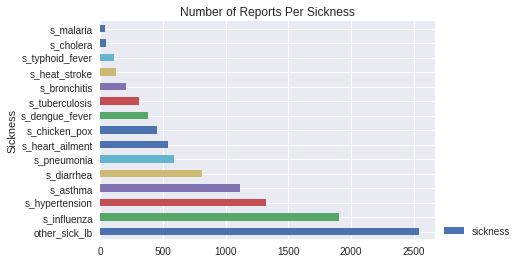

In [0]:
df_count = dfstacked["sickness"].value_counts()

plt.title("Number of Reports Per Sickness")
plt.ylabel("Sickness")


df_count.plot.barh(legend=False)
plt.legend(bbox_to_anchor=((1,0.1)))

We can see here that most of the sickness are in the others category followed by influenza and then hyptertension and asthma.

Let us try to see the number of reported household per water source category in 2011.

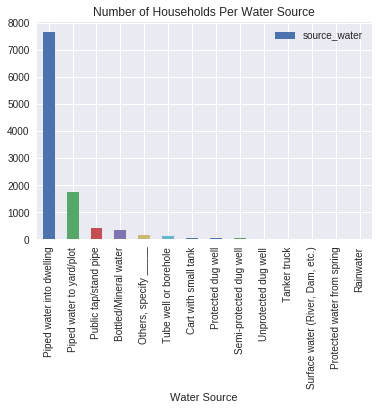

In [0]:
df_count = dfstacked["source_water"].value_counts()

plt.title("Number of Households Per Water Source")
plt.xlabel("Water Source")

df_count.plot.bar(legend=False)
plt.legend(bbox_to_anchor=((1,1)))

We can see here that majority have piped water into dwelling as their water source.

Let us also try to see the number of households per garbage collection frequency.

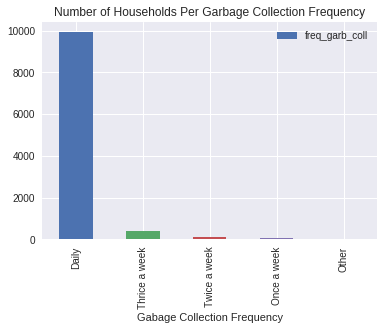

In [0]:
df_count = dfstacked["freq_garb_coll"].value_counts()

plt.title("Number of Households Per Garbage Collection Frequency")
plt.xlabel("Gabage Collection Frequency")

df_count.plot.bar(legend=False)
plt.legend(bbox_to_anchor=((1,1)))

So here we see that a great majority have their garbages collected daily.

Let us then try to see which water source comprises each sickness category.

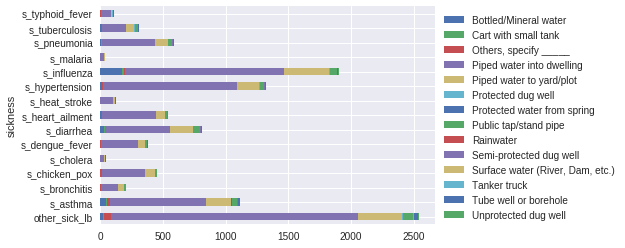

In [0]:
stackedBars = dfstacked.groupby(['sickness', 'source_water'])['sickness'].count().unstack('source_water').fillna(0)
stackedBars.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=((1,1)))

Each sickness category have majority from the piped water into dwelling as water source.

Let us also try to see the same for garbage collection frequency.

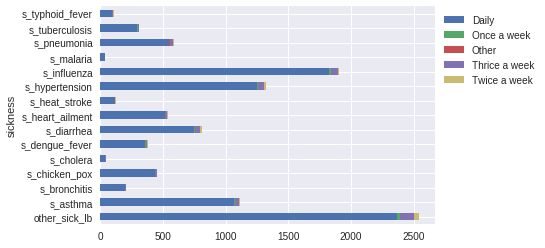

In [0]:
stackedBars = dfstacked.groupby(['sickness', 'freq_garb_coll'])['sickness'].count().unstack('freq_garb_coll').fillna(0)
stackedBars.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=((1,1)))

Each sickness category have majority of their garbage being collected daily.

We can also see the difference of each water source per sickness by grouping them.

For water source we have the following:

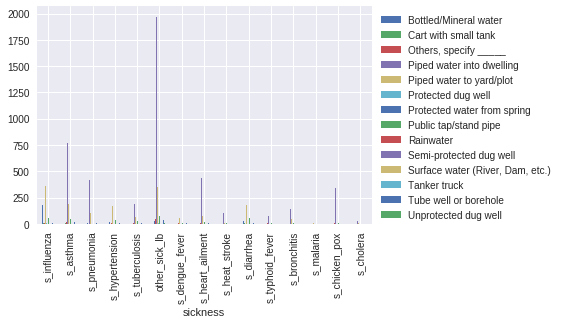

In [0]:
groupedBars = pd.DataFrame()
for sickness in dfstacked["sickness"].unique():
    tempdf = dfstacked[dfstacked["sickness"]==sickness]["source_water"].value_counts().reset_index()
    tempdf["sickness"] = sickness
    tempdf = tempdf.pivot(index="sickness", columns="index", values="source_water")
    groupedBars = groupedBars.append(tempdf)
    
groupedBars.plot.bar()
plt.legend(bbox_to_anchor=((1,1)))

And then for garbage collection frequency we have as follows:

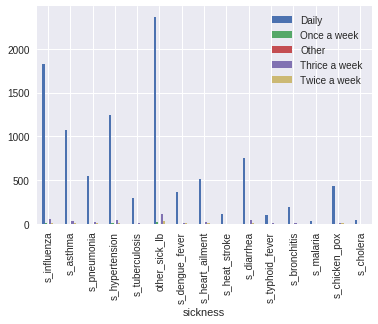

In [0]:
groupedBars = pd.DataFrame()
for sickness in dfstacked["sickness"].unique():
    tempdf = dfstacked[dfstacked["sickness"]==sickness]["freq_garb_coll"].value_counts().reset_index()
    tempdf["sickness"] = sickness
    tempdf = tempdf.pivot(index="sickness", columns="index", values="freq_garb_coll")
    groupedBars = groupedBars.append(tempdf)
    
groupedBars.plot.bar()
plt.legend(bbox_to_anchor=((1,1)))

We can see the same thing for both grouped bar charts that majority are of piped water into dwelling for water source and garbages collected daily for the frequency of garbage collection.

## Data Visualization

### Heatmaps

Since both x and y axis are categorical, heatmap is best used to visualize any relationships. In our case, we will use plotly library for heatmap.

In [0]:
import plotly.plotly as py
py.sign_in('ivana_lim', 'F1ob1tLmW5Awe4kZNjs7')
import plotly.graph_objs as go

# py.__version__
# py.tools.set_credentials_file(username='ivana_lim', api_key='F1ob1tLmW5Awe4kZNjs7')

#### Values for each variable

To make things more organized, let us also make a list that contains the values for each variable in the manner that we want to present in the heatmaps. 

In [0]:
sicknesses = [
    "s_pneumonia",
    "s_bronchitis",
    "s_diarrhea",
    "s_influenza",
    "s_hypertension",
    "s_tuberculosis",
    "s_heart_ailment",
    "s_malaria",
    "s_chicken_pox",
    "s_dengue_fever",
    "s_cholera",
    "s_typhoid_fever",
    "s_heat_stroke",
    "s_asthma",
    "other_sick",
]

w_sources = [
    "Piped water to yard/plot",
    "Public tap/stand pipe",
    "Tube well or borehole",
    "Protected dug well",
    "Semi-protected dug well",
    "Unprotected dug well",
    "Piped water into dwelling",
    "Protected water from spring",
    "Unprotected water from spring",
    "Rainwater",
    "Tanker truck",
    "Cart with small tank",
    "Surface water (River, Dam, etc.)",
    "Bottled/Mineral water",
    "Others, specify _____",
]

garb_coll_freq = [
    "Thrice a week",
    "Twice a week",
    "Once a week",
    "Daily",
    "Others",
]

Let us also define the labels to be shown in the heatmap for each variable.

In [0]:
lbl_sicknesses = [
    "Pneumonia",
    "Bronchitis",
    "Diarrhea",
    "Influenza",
    "Hypertension",
    "Tuberculosis",
    "Heart ailment",
    "Malaria",
    "Chicken pox",
    "Dengue fever",
    "Cholera",
    "Typhoid fever",
    "Heat stroke",
    "Asthma",
    "Others",
]

lbl_water_sources = [
    "Piped water to yard/plot",
    "Public tap/stand pipe",
    "Tube well or borehole",
    "Protected dug well",
    "Semi-protected dug well",
    "Unprotected dug well",
    "Piped water into dwelling",
    "Protected spring water",
    "Unprotected spring water",
    "Rainwater",
    "Tanker truck",
    "Cart with small tank",
    "Surface water",
    "Bottled/Mineral water",
    "Others",
]

lbl_garb_coll_freq = [
    "Thrice a week",
    "Twice a week",
    "Once a week",
    "Daily",
    "Others",
]

Let us then get the values from the dataframe before passing it to plotyly for plotting.

So for the water sources and sicknesses, we will be getting the counts of each water source category per sickness and putting it to a two-dimensional array.

In [0]:
wsource_array = []

for source in w_sources:
  row = []
  for sickness in sicknesses:
    row.append(len(dfstacked[(dfstacked["source_water"]==source) & (dfstacked["sickness"]==sickness)]))
  wsource_array.append(row)
  
len(wsource_array)
wsource_array

[[102, 44, 180, 361, 175, 69, 72, 8, 76, 55, 11, 15, 10, 194, 0],
 [32, 13, 59, 52, 38, 26, 14, 0, 11, 13, 3, 5, 6, 47, 0],
 [11, 2, 9, 8, 9, 6, 5, 1, 4, 6, 2, 2, 1, 15, 0],
 [3, 2, 4, 7, 4, 5, 2, 0, 2, 0, 0, 1, 0, 5, 0],
 [3, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 4, 0],
 [0, 0, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [422, 141, 515, 1263, 1067, 191, 432, 32, 345, 298, 27, 78, 105, 768, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
 [3, 2, 11, 13, 3, 3, 0, 0, 0, 0, 0, 0, 0, 7, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [9, 0, 29, 177, 14, 4, 5, 0, 3, 1, 1, 1, 1, 51, 0],
 [4, 3, 2, 12, 8, 6, 10, 1, 13, 6, 0, 5, 0, 22, 0]]

Let us also do the same for the garbage collection frequency and the sickness variable by getting the counts of each garbage collection frequency category per sickness.

In [0]:
garb_array = []

for freq in garb_coll_freq:
  row = []
  for sickness in sicknesses:
    row.append(len(dfstacked[(dfstacked["freq_garb_coll"]==freq) & (dfstacked["sickness"]==sickness)]))
  garb_array.append(row)
  
len(garb_array)
garb_array

[[24, 10, 47, 53, 50, 9, 18, 2, 14, 9, 3, 7, 3, 33, 0],
 [12, 3, 13, 9, 16, 4, 7, 0, 5, 6, 0, 2, 1, 11, 0],
 [1, 0, 4, 15, 6, 1, 2, 1, 1, 2, 0, 0, 1, 3, 0],
 [552, 196, 749, 1825, 1249, 298, 516, 39, 436, 361, 41, 97, 118, 1070, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

Now that we have the necessary lists, we can now plot the heatmap by passing in the lists and the labels we defined earlier. For the color scale, we will be using Viridis as it has a better color scale for viewing the difference in magnitude.

In [0]:
import random
trace = go.Heatmap(z=wsource_array,
                   x=lbl_sicknesses,
                   y=lbl_water_sources,
                   colorscale='Viridis'
                  )

data=[trace]
layout = go.Layout(
    title='Heatmap for sickness occurences with corresponding water sources',
    xaxis = dict(
        title='Sickness',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
        ticks='', nticks=16
    ),
    yaxis = dict(
#         title='Water Source',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
        showticklabels=True,
        tickangle=60,
    )
)
fig1 = go.Figure(data=data, layout=layout)
py.iplot(fig1, filename='labelled-heatmap')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ivana_lim/0 or inside your plot.ly account where it is named 'labelled-heatmap'


So in Viridis color scaling, the more yellow a cell is, the more counts it has. So for the sickness and water source heatmap, we can see here that there are a lot of reported sickness in the Influenza category, and at the same time having piped water into dwelling as water source. We can speculate here that since most of the household has piped water into dwelling and the most reported sickness is Influenza, it is no wonder that the intersection of these two categories has the most yellow color.

Later on we will be testing if the water source variable is indeed independent to the sickness variable by using the Chi-Squared Independence Test in the next section.

Next, let us take a look with the heatmap for the garbage collection frequency and sickness variables.

In [0]:
import random
trace = go.Heatmap(z=garb_array,
                   x=lbl_sicknesses,
                   y=lbl_garb_coll_freq,
                   colorscale='Viridis'
                  )
data=[trace]
layout = go.Layout(
    title='Heatmap for sickness occurences with corresponding garbage collection frequency',
    xaxis = dict(
        title='Sickness',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
        ticks='', nticks=16
    ),
    yaxis = dict(
        title='Garbage Collection Frequency',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
        showticklabels=True,
        tickangle=55,
    )
)
fig2 = go.Figure(data=data, layout=layout)
py.iplot(fig2, filename='labelled-heatmap')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ivana_lim/0 or inside your plot.ly account where it is named 'labelled-heatmap'


We can also see here that the most yellow cell is the intersection between the Daily frequency category and the most reported sickness of Influenza. Again, we can speculate here that since most of the household has their garbages collected daily and the most reported sickness is Influenza, it is no wonder that the intersection of these two categories has the most yellow color.

### Contour

Plotly also has a contour visualization, so let us also see how the variables look in a contour plot.

In [0]:
import random
trace = go.Contour(z=wsource_array,
                   x=lbl_sicknesses,
                   y=lbl_water_sources,
                   colorscale='Viridis'
                  )

data=[trace]
layout = go.Layout(
    title='Contour for sickness occurences with corresponding water sources',
    xaxis = dict(
        title='Sickness',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
        ticks='', nticks=16
    ),
    yaxis = dict(
#         title='Water Source',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
        showticklabels=True,
        tickangle=65,
    )
)
fig3 = go.Figure(data=data, layout=layout)
py.iplot(fig3, filename='labelled-heatmap')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ivana_lim/0 or inside your plot.ly account where it is named 'labelled-heatmap'


In [0]:
import random
trace = go.Contour(z=garb_array,
                   x=lbl_sicknesses,
                   y=lbl_garb_coll_freq,
                   colorscale='Viridis'
                  )
data=[trace]
layout = go.Layout(
    title='Contour for sickness occurences with corresponding garbage collection frequency',
    xaxis = dict(
        title='Sickness',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
        ticks='', nticks=16
    ),
    yaxis = dict(
        title='Garbage Collection Frequency',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
        showticklabels=True,
        tickangle=55,
    )
)
fig4 = go.Figure(data=data, layout=layout)
py.iplot(fig4, filename='labelled-heatmap')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ivana_lim/0 or inside your plot.ly account where it is named 'labelled-heatmap'


The two contour plots tell us the same thing as the heatmap except presented in a different way.

### Percent stacked barplot

The percent stacked barplot helps us visualize that the frequency distribution of the water source/garbage collection frequency variable is relatively the same or independent for all levels of the sickness variable variable. 

In [0]:
# Prepare the data
sbcdf = pd.DataFrame(data=dfstacked.groupby(["source_water","sickness"]).count()["val"])
sbcdf = sbcdf.reset_index()
sbcdf = sbcdf.pivot(index="sickness", columns="source_water", values="val")
sbcdf.columns = sbcdf.columns.get_level_values(0)
# sbcdf

In [0]:
# Set nans to 0s
sbcdf[sbcdf.isnull()] = 0
# sbcdf

In [0]:
# Get total of water sources per sickness
sbcdf["total"] = sbcdf.apply(lambda x : x.sum(), axis =1)
# sbcdf

In [0]:
# Get the ratio of count of a water source per sickness
sbcdf = sbcdf.apply(lambda x : x/x[len(dfstacked["source_water"].unique())], axis=1)
# sbcdf

(0.0, 1.0000000000000002)

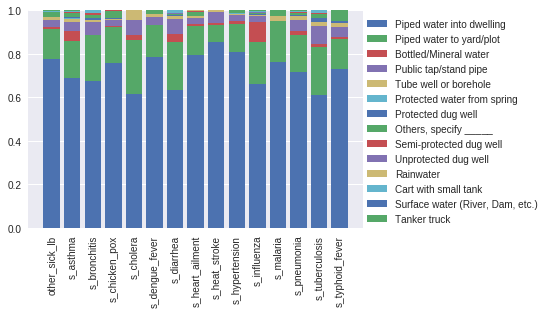

In [0]:
index = range(len(sicknesses))

fig, ax = plt.subplots()

runningy = [0] * len(sicknesses)

for source in dfstacked["source_water"].unique():
    plt.bar(index, sbcdf[source], bottom=runningy, label=source)
    runningy += sbcdf[source]

ax.set_xticklabels(sbcdf.index, rotation="vertical")
ax.set_xticks(index)
ax.legend(loc=(1,0))
ax.set_ylim(auto=True)

We can see here that majority of all the sicknesses reported by the household also have piped water into dwelling as their water source, however, the varying levels of water source might say something about sickness. Let us then further validate this in the next section.

But first let us also take a look on the percent stacked bar chart for the garbage collectionf frequency.

In [0]:
# Prepare the data
sbcdf = pd.DataFrame(data=dfstacked.groupby(["freq_garb_coll","sickness"]).count()["val"])
sbcdf = sbcdf.reset_index()
sbcdf = sbcdf.pivot(index="sickness", columns="freq_garb_coll", values="val")
sbcdf.columns = sbcdf.columns.get_level_values(0)
# sbcdf

In [0]:
# Set nans to 0s
sbcdf[sbcdf.isnull()] = 0
# sbcdf

In [0]:
# Get total of water sources per sickness
sbcdf["total"] = sbcdf.apply(lambda x : x.sum(), axis =1)
# sbcdf

In [0]:
# Get the ratio of count of a water source per sickness
sbcdf = sbcdf.apply(lambda x : x/x[len(dfstacked["freq_garb_coll"].unique())], axis=1)
# sbcdf

(0.0, 1.0)

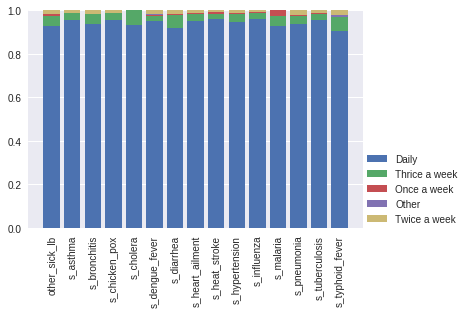

In [0]:
index = range(len(sicknesses))

fig, ax = plt.subplots()

runningy = [0] * len(sicknesses)

for source in dfstacked["freq_garb_coll"].unique():
    plt.bar(index, sbcdf[source], bottom=runningy, label=source)
    runningy += sbcdf[source]

ax.set_xticklabels(sbcdf.index, rotation="vertical")
ax.set_xticks(index)
ax.legend(loc=(1,0))
ax.set_ylim(auto=True)

We can see here that majority of all the sicknesses reported by the household also have their garbages collected at a daily basis, so garbage collection frequency here does not significantly say anything at all about sickness. Let us then further validate this in the next section.

## Hypothesis Testing

Moving forward, let us now test whether our hypothesis that the water source and garbage collection variables are independent of the sickness variable using the Chi-Squared Independence Test for categorical variables.

### Chi-Squared Independence Test

http://www-ist.massey.ac.nz/dstirlin/CAST/CAST/Hindep/indep6.html
<br>
https://www.spss-tutorials.com/chi-square-independence-test/
<br>
https://www.ling.upenn.edu/~clight/chisquared.htm

The chi-square independence test is a procedure for testing if two categorical variables are related in some population. In our case, we will be using the chi-square independence test since the indicators being analyzed are all categorical variables. So we will be testing if the <b>illness (sickness) variable and the water souce</b> variable are independent of each other or they are related in the Pasay City population, and also if the <b>illness and frequencey of garbage collection</b> are independent.

#### Chi-Square Test - Null Hypothesis
The null hypothesis for a chi-square independence test is that

<center><b>two categorical variables are independent in some population.</b></center>

For sickness and water source, our null and alternative hypotheses are:
* $H_0$: Sickness and water source are independent. 
* $H_a$: Sickness and water source are dependent.

For sickness and garbage collection frequency, our null and alternative hypotheses are:
* $H_0$: Sickness and garbage collection frequency are independent. 
* $H_a$: Sickness and garbage collection frequency are dependent.

#### Observed Frequencies

Constructing the <b>Observed Frequency Distribution</b> of <b>water sources</b> for each sickness category separately.

In [0]:
O_wsource_FDT = []

for source in w_sources:
  row = []
  for sickness in sicknesses:
    row.append(len(dfstacked[(dfstacked["source_water"]==source) & (dfstacked["sickness"]==sickness)])) # & (dfstacked["brgy"]==183)
  O_wsource_FDT.append(row)
  
# len(O_wsource_FDT)
O_wsource_FDT

[[102, 44, 180, 361, 175, 69, 72, 8, 76, 55, 11, 15, 10, 194, 0],
 [32, 13, 59, 52, 38, 26, 14, 0, 11, 13, 3, 5, 6, 47, 0],
 [11, 2, 9, 8, 9, 6, 5, 1, 4, 6, 2, 2, 1, 15, 0],
 [3, 2, 4, 7, 4, 5, 2, 0, 2, 0, 0, 1, 0, 5, 0],
 [3, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 4, 0],
 [0, 0, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [422, 141, 515, 1263, 1067, 191, 432, 32, 345, 298, 27, 78, 105, 768, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
 [3, 2, 11, 13, 3, 3, 0, 0, 0, 0, 0, 0, 0, 7, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [9, 0, 29, 177, 14, 4, 5, 0, 3, 1, 1, 1, 1, 51, 0],
 [4, 3, 2, 12, 8, 6, 10, 1, 13, 6, 0, 5, 0, 22, 0]]

Constructing the <b>Observed Frequency Distribution</b> of <b>garbage collection frequency</b> for each sickness category separately.

In [0]:
O_garb_FDT = []

for freq in garb_coll_freq:
  row = []
  for sickness in sicknesses:
    row.append(len(dfstacked[(dfstacked["freq_garb_coll"]==freq) & (dfstacked["sickness"]==sickness)]))# & (dfstacked["brgy"]==183)
  O_garb_FDT.append(row)
  
# len(O_garb_FDT)
O_garb_FDT

[[24, 10, 47, 53, 50, 9, 18, 2, 14, 9, 3, 7, 3, 33, 0],
 [12, 3, 13, 9, 16, 4, 7, 0, 5, 6, 0, 2, 1, 11, 0],
 [1, 0, 4, 15, 6, 1, 2, 1, 1, 2, 0, 0, 1, 3, 0],
 [552, 196, 749, 1825, 1249, 298, 516, 39, 436, 361, 41, 97, 118, 1070, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

####Expected Frequencies
<center><b>Expected frequencies are the frequencies we expect in our sample if the null hypothesis holds.</b></center>
$$eij = \frac{oi.\,oj}{N}$$

where

* eij is an expected frequency;
* oi is a marginal column frequency (total count of that column);
* oj is a marginal row frequency (total count of that row);
* N is the total sample size.

In [0]:
N = len(dfstacked) #len(dfstacked.loc[(dfstacked["brgy"]==183)])
N

10501

Constructing the <b>Expected Frequency Distribution</b> of <b>water source</b> for each sickness category separately.

In [0]:
E_wsource_FDT = []

for source in w_sources:
  row = []
  for sickness in sicknesses:
    oi = len(dfstacked[(dfstacked["sickness"]==sickness)])# & (dfstacked["brgy"]==183)
    oj = len(dfstacked[(dfstacked["source_water"]==source)])# & (dfstacked["brgy"]==183)
    eij = (oi * oj) / N
    row.append(eij)
#     row.append(len(dfstacked[(dfstacked["source_water"]==source) & (dfstacked["sickness"]==sickness)]))
  E_wsource_FDT.append(row)
  
# len(E_wsource_FDT)
# E_wsource_FDT

Constructing the <b>Expected Frequency Distribution</b> of <b>garbage collection frequency</b> for each sickness category separately.

In [0]:
E_garb_FDT = []

for freq in garb_coll_freq:
  row = []
  for sickness in sicknesses:
    oi = len(dfstacked[(dfstacked["sickness"]==sickness)])# & (dfstacked["brgy"]==183)
    oj = len(dfstacked[(dfstacked["freq_garb_coll"]==freq)])# & (dfstacked["brgy"]==183)
    eij = (oi * oj) / N
    row.append(eij)
#     garb_sick_count = len(dfstacked[(dfstacked["freq_garb_coll"]==freq) & (dfstacked["sickness"]==sickness)])
#     sick_count = len(dfstacked["sickness"]==sickness)
#     population_ratio = garb_sick_count/sick_count
#     print(population_ratio)  
#     row.append(population_ratio * len(dfstacked[(dfstacked["freq_garb_coll"]==freq) & (dfstacked["sickness"]==sickness)  & (dfstacked["brgy"]==191)]))
  E_garb_FDT.append(row)
  
# len(E_garb_FDT)
# E_garb_FDT

####Test Statistic
<center>The chi-square test statistic is calculated as</center>
$$\chi^2 = \Sigma{\frac{(oij - eij)^2}{eij}}$$

In [0]:
x_chi_wsource = 0
for i, val in enumerate(O_wsource_FDT):
  for j, val2 in enumerate(O_wsource_FDT[i]):
    if(E_wsource_FDT[i][j] > 0): # prevent division by zero
      x_chi_wsource += (O_wsource_FDT[i][j] - E_wsource_FDT[i][j])**2 / E_wsource_FDT[i][j]
#       print(x_chi_wsource)

print("Chi-square test statistic for water source & sickness: ", x_chi_wsource)
  

Chi-square test statistic for water source & sickness:  675.7376740799502


In [0]:
x_chi_garb = 0
for i, val in enumerate(O_garb_FDT):
  for j, val2 in enumerate(O_garb_FDT[i]):
    if(E_garb_FDT[i][j] > 0): # prevent division by zero
      x_chi_garb += (O_garb_FDT[i][j] - E_garb_FDT[i][j])**2 / E_garb_FDT[i][j]
#       print(x_chi_garb)

print("Chi-square test statistic for garbage collection frequency & sickness: ", x_chi_garb)
  

Chi-square test statistic for garbage collection frequency & sickness:  52.90411368588868


#### Degrees of Freedom
We'll get the significance level we're after from the chi-square distribution if we give it 2 numbers:

* the χ2 value and
* the degrees of freedom (df).

The degrees of freedom is basically a number that determines the exact shape of our distribution. It's calculated as

$$df = (i - 1) \cdot (j - 1)$$

where

* i is the number of rows in our contingency table and
* j is the number of columns

For all the variables, we will also be using an alpha level of 5%. For calculating the critical values and p values, Scipy has a built in function for it, so we will be using them.

In [0]:
from scipy import stats

Let us compute first the degree of freedom, critical value, and the p value for the water source and sickness variables.

In [0]:
deg_of_freedom = (len(O_wsource_FDT)-1) * (len(O_wsource_FDT[0])-1)
print("Degrees of Freedom: ", deg_of_freedom)

crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = deg_of_freedom)   # Df = number of variable categories - 1

print("Critical value: ", crit)

p_value = 1 - stats.chi2.cdf(x=x_chi_wsource,  # Find the p-value
                             df=deg_of_freedom)
print("P value: ", p_value)

Degrees of Freedom:  196
Critical value:  229.66322644710888
P value:  0.0


So for water source and sickness variables, we have a p value of 0.0, meaning these variables are not completely independent of each other. However, it is possible to have a p value of 0.0 with a weak association in a large sample, so we will also be testing how strong are these two categorical variables associated using Cramér’s V later on in the next section.

So after the water source and sickness variables, let us also compute next for the garbage collection frequency and sickness. We have:

In [0]:
deg_of_freedom = (len(O_garb_FDT)-1) * (len(O_garb_FDT[0])-1)
print("Degrees of Freedom: ", deg_of_freedom)

crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = deg_of_freedom)   # Df = number of variable categories - 1

print("Critical value: ", crit)

p_value = 1 - stats.chi2.cdf(x=x_chi_garb,  # Find the p-value
                             df=deg_of_freedom)
print("P value: ", p_value)

Degrees of Freedom:  56
Critical value:  74.46832415930936
P value:  0.5928040162526284


It is clear here that the garbage collection frequency variable is independent of the sickness variable with a p value of 0.59.

#### Conclusion

<b>In conclusion, 
* an association between sickness and water source was observed, χ2(196) = 675.7377 p = 0.0 (Rejenct null hypothesis that the variables are independent), and 
* an independence between sickness and garbage collection frequency was observed, χ2(56) = 52.9041 p = 0.5928 (Fail to reject null hypothesis that the variables are independent)</b>



A significance level close to zero as in the case of the water source and sickness means that the variables are very unlikely to be completely unassociated in some population. However, this does not mean the variables are strongly associated; a weak association in a large sample size may also result in p = 0.000. So let us check for the Cramer's V for the water source and sickness variables.

### Cramér’s V

https://www.spss-tutorials.com/cramers-v-what-and-why/

Cramér’s V is a number between 0 and 1 that indicates how strongly two categorical variables are associated.


If we'd like to know if 2 categorical variables are associated, our first option is the chi-square independence test. A significance level close to zero as in the case of the water source and sickness means that the variables are very <b>unlikely to be completely unassociated</b> in some population. However, this does not mean the variables are strongly associated; a weak association in a large sample size may also result in p = 0.000. So let us check for the Cramer's V for the water source and sickness variables.

#### Cramér’s V - Formula
A measure that does indicate the strength of the association is Cramér’s V, defined as

$$\phi_c = \sqrt{\frac{\chi^2}{N(k - 1)}}$$


where

* ϕc denotes Cramér’s V;
* χ2 is the Pearson chi-square statistic from the aforementioned test;
* N is the sample size involved in the test and
* k is the lesser number of categories of either variable.

So computing for the Cramér’s V of water source and sickness variables we have:

In [0]:
phi_c = np.sqrt(x_chi_wsource / (N * (min(len(w_sources), len(sicknesses))-1)))
phi_c

0.06779688172547167

#### Conclusion

We can see here that the Cramer's V for the water source and sickness variables is close to 0, meaning <b>there is a weak association relation (might as well say they are independent of each other) between these two categorical variables</b> althogh having a p value of 0.0.

To also see the Cramer's V for the garbage collection frequency and sickness variable which already are independent of each other based on the Chi-square :

In [0]:
phi_c = np.sqrt(x_chi_garb / (N * (min(len(garb_coll_freq), len(sicknesses))-1)))
phi_c

0.035489460433674694

We can see here that they are really weakly associated/independent of each other and the results agree with the values we calculated above.

### Chi-Squared Goodness of Fit Test

http://www.stat.yale.edu/Courses/1997-98/101/chigf.htm
<br>
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html

For the Chi-Squared Goodness of Fit Test, we will be using Brgy. 183 as the sample since it also has the most number of reported entries for sicknesses, followed by neighboring Brgys.184 and 191.

<img src="https://raw.githubusercontent.com/poisonivysaur/DATASCI-MP/master/brgys.png" />

In [0]:
dfstacked["brgy"].value_counts().head(5)

183    486
184    426
191    404
135    345
14     329
Name: brgy, dtype: int64

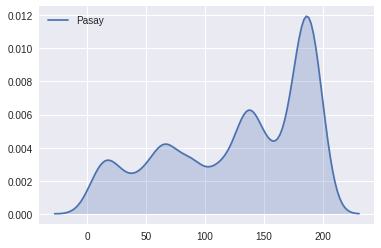

In [0]:
sns.kdeplot(dfstacked["brgy"], shade=True, label="Pasay")
# sns.kdeplot(brgy183_sick, shade=True, label="Brgy. 183")

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats

The chi-squared goodness-of-fit test is an analog of the one-way t-test for categorical variables: it tests whether the distribution of sample categorical data matches an expected distribution.

#### Null Hypothesis

In our case, we will use the chi-squared goodness-of-fit test to check whether the sickness, water source, and garbage collection frequency distribution in Brgy. 183 match that of the entire Pasay city population as a whole.

* $H_0$: The distribution of Brgy 183 matches the Pasay city distribution as a whole. 
* $H_a$: The distribution of Brgy 183 does not match the Pasay city distribution as a whole. 


#### Sickness

In [0]:
pasay_sick = dfstacked["sickness"].value_counts().sort_index()
brgy183_sick = dfstacked.loc[dfstacked["brgy"] == 183, "sickness"].value_counts().sort_index()

observed = brgy183_sick

population_ratios = pasay_sick/len(dfstacked)  # Get population ratios

expected = population_ratios * len(dfstacked.loc[dfstacked["brgy"] == 183])   # Get expected counts

chi2_sick = (((observed-expected)**2)/expected).sum()

print(chi2_sick)

123.53548930426199


In [0]:
dof = len(sicknesses)-1
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = dof)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi2_sick,  # Find the p-value
                             df=dof)
print("P value")
print(p_value)

Critical value
23.684791304840576
P value
0.0


Since our chi-squared statistic exceeds the critical value, <b>we'd reject the null hypothesis that the two distributions are the same.</b>

We also can carry out a chi-squared goodness-of-fit test automatically using the scipy function scipy.stats.chisquare():

In [0]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected) 

Power_divergenceResult(statistic=123.53548930426199, pvalue=1.2747358415042452e-19)

The test results agree with the values we calculated above.

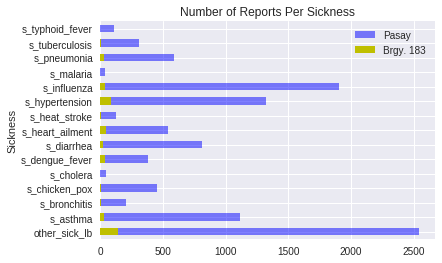

In [0]:
plt.title("Number of Reports Per Sickness")
plt.ylabel("Sickness")


pasay_sick.plot.barh(legend=False, color="b", alpha=0.5, label="Pasay")
brgy183_sick.plot.barh(legend=False, color="y", label="Brgy. 183")
plt.legend(bbox_to_anchor=((1,1)))

In [0]:
pasay_sick

other_sick_lb      2541
s_asthma           1117
s_bronchitis        209
s_chicken_pox       456
s_cholera            44
s_dengue_fever      379
s_diarrhea          813
s_heart_ailment     543
s_heat_stroke       123
s_hypertension     1322
s_influenza        1903
s_malaria            42
s_pneumonia         590
s_tuberculosis      312
s_typhoid_fever     107
Name: sickness, dtype: int64

In [0]:
brgy183_sick

other_sick_lb      140
s_asthma            34
s_bronchitis         8
s_chicken_pox        9
s_cholera            1
s_dengue_fever      42
s_diarrhea          27
s_heart_ailment     48
s_heat_stroke        8
s_hypertension      88
s_influenza         39
s_malaria            2
s_pneumonia         32
s_tuberculosis       6
s_typhoid_fever      2
Name: sickness, dtype: int64

#### Source of Water

In [0]:
dfstacked.loc[dfstacked["brgy"] == 183, "source_water"].value_counts().sort_index()

Bottled/Mineral water          3
Piped water into dwelling    458
Piped water to yard/plot      23
Tanker truck                   2
Name: source_water, dtype: int64

In [0]:
zero_values = {
    "Bottled/Mineral water": 3, 
    "Cart with small tank": 0,
    "Others, specify _____": 0,
    "Piped water into dwelling": 458,
    "Piped water to yard/plot": 23,
    "Protected dug well": 0,
    "Protected water from spring": 0,
    "Public tap/stand pipe": 0,
    "Rainwater": 0,
    "Semi-protected dug well": 0,
    "Surface water (River, Dam, etc.)": 0,
    "Tanker truck": 2,
    "Tube well or borehole": 0,
    "Unprotected dug well": 0
}
brgy183_wsource = pd.Series(zero_values)
# brgy183_wsource

In [0]:
pasay_wsource = dfstacked["source_water"].value_counts().sort_index()
# brgy183_wsource = dfstacked.loc[dfstacked["brgy"] == 183, "source_water"].value_counts().sort_index()

observed = brgy183_wsource

population_ratios = pasay_wsource/len(dfstacked)  # Get population ratios

expected = population_ratios * len(dfstacked.loc[dfstacked["brgy"] == 183])   # Get expected counts

chi2_wsource = (((observed-expected)**2)/expected).sum()

print(chi2_wsource)

121.31585113500816


In [0]:
dof = len(w_sources)-1
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = dof)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi2_wsource,  # Find the p-value
                             df=dof)
print("P value")
print(p_value)

Critical value
23.684791304840576
P value
0.0


Since our chi-squared statistic exceeds the critical value, we'd <b>reject the null hypothesis that the two distributions are the same.</b>

We also can carry out a chi-squared goodness-of-fit test automatically using the scipy function scipy.stats.chisquare():

In [0]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected) 

Power_divergenceResult(statistic=121.31585113500816, pvalue=1.106074511218579e-19)

The test results agree with the values we calculated above.

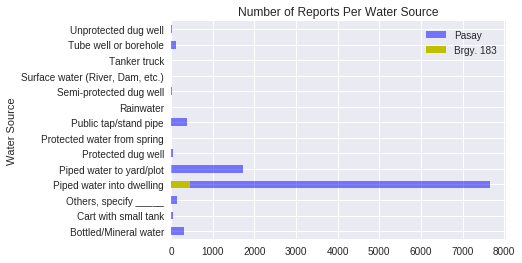

In [0]:
plt.title("Number of Reports Per Water Source")
plt.ylabel("Water Source")


pasay_wsource.plot.barh(legend=False, color="b", alpha=0.5, label="Pasay")
brgy183_wsource.plot.barh(legend=False, color="y", label="Brgy. 183")
plt.legend(bbox_to_anchor=((1,1)))

In [0]:
pasay_wsource

Bottled/Mineral water                323
Cart with small tank                  50
Others, specify _____                141
Piped water into dwelling           7653
Piped water to yard/plot            1726
Protected dug well                    43
Protected water from spring            2
Public tap/stand pipe                396
Rainwater                              2
Semi-protected dug well               21
Surface water (River, Dam, etc.)       4
Tanker truck                          11
Tube well or borehole                115
Unprotected dug well                  14
Name: source_water, dtype: int64

In [0]:
brgy183_wsource

Bottled/Mineral water                 3
Cart with small tank                  0
Others, specify _____                 0
Piped water into dwelling           458
Piped water to yard/plot             23
Protected dug well                    0
Protected water from spring           0
Public tap/stand pipe                 0
Rainwater                             0
Semi-protected dug well               0
Surface water (River, Dam, etc.)      0
Tanker truck                          2
Tube well or borehole                 0
Unprotected dug well                  0
dtype: int64

#### Frequency of Garbage Collection

In [0]:
pasay_garb = dfstacked["freq_garb_coll"].value_counts().sort_index()
brgy183_garb = dfstacked.loc[dfstacked["brgy"] == 183, "freq_garb_coll"].value_counts().sort_index()

observed = brgy183_garb

population_ratios = pasay_garb/len(dfstacked)  # Get population ratios

expected = population_ratios * len(dfstacked.loc[dfstacked["brgy"] == 183])   # Get expected counts

chi2_garb = (((observed-expected)**2)/expected).sum()

print(chi2_garb)

135.60801536362746


In [0]:
dof = len(garb_coll_freq)-1
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = dof)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi2_garb,  # Find the p-value
                             df=dof)
print("P value")
print(p_value)

Critical value
9.487729036781154
P value
0.0


Since our chi-squared statistic exceeds the critical value, <b>we'd reject the null hypothesis that the two distributions are the same.</b>

We also can carry out a chi-squared goodness-of-fit test automatically using the scipy function scipy.stats.chisquare():

In [0]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected) 

Power_divergenceResult(statistic=135.60801536362746, pvalue=2.458710231836081e-28)

The test results agree with the values we calculated above.

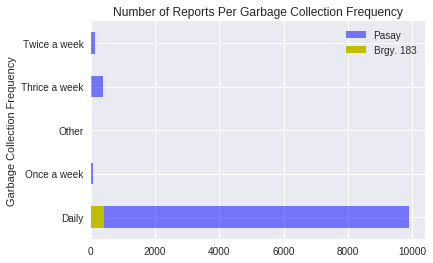

In [0]:
plt.title("Number of Reports Per Garbage Collection Frequency")
plt.ylabel("Garbage Collection Frequency")


pasay_garb.plot.barh(legend=False, color="b", alpha=0.5, label="Pasay")
brgy183_garb.plot.barh(legend=False, color="y", label="Brgy. 183")
plt.legend(bbox_to_anchor=((1,1)))

In [0]:
pasay_garb

Daily            9912
Once a week        63
Other               7
Thrice a week     393
Twice a week      126
Name: freq_garb_coll, dtype: int64

In [0]:
brgy183_garb

Daily            405
Once a week       10
Other              1
Thrice a week     43
Twice a week      27
Name: freq_garb_coll, dtype: int64

<h1><center>End</center></h1>

# Scratch

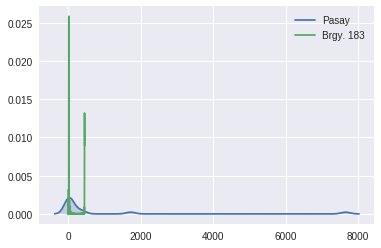

In [0]:
sns.kdeplot(pasay_wsource, shade=True, label="Pasay")
sns.kdeplot(brgy183_wsource, shade=True, label="Brgy. 183")

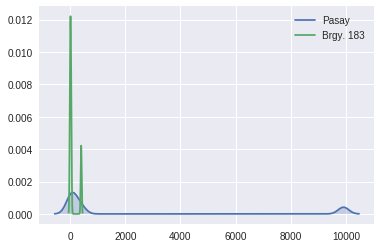

In [0]:
sns.kdeplot(pasay_garb, shade=True, label="Pasay")
sns.kdeplot(brgy183_garb, shade=True, label="Brgy. 183")

No handles with labels found to put in legend.


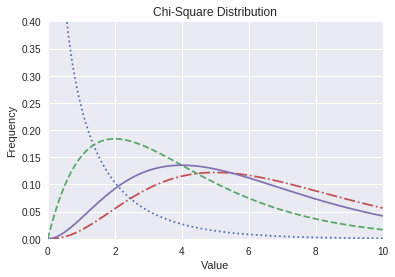

In [0]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
fig,ax = plt.subplots(1,1)

linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 4, 7, 6]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls)

plt.xlim(0, 10)
plt.ylim(0, 0.4)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Chi-Square Distribution')

plt.legend()
plt.show()

## TESTING JOIN

In [0]:
mem_file_path = "/gdrive/My Drive/DATASCI/pasay_compressed/Pasay_2011_csv/hpq_mem.csv"

In [0]:
dfmem = pd.read_csv(file_path, encoding="latin-1")
# dfmem.columns
dfmem["g_occ"]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (11,13,50,55,57,58,61,63,72,138,140,141,142,143,144,145,146,147,148,150,153,163,165,167,202,203,204,205,206,208,209,211,212,213,214,215,222,231) have mixed types. Specify dtype option on import or set low_memory=False.



KeyError: ignored

In [0]:
dfmem = dfmem[['brgy', 'purok', 'hcn', 'g_occ']].copy()
dfmem

In [0]:
df_merged = pd.merge(dfstacked, dfmem, on='hcn')
df_merged

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [0]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

In [0]:
len(minnesota)

In [0]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

In [0]:
national_ratios

In [0]:
expected

In [0]:
observed

In [0]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

In [0]:
# bruteforce sample
dailyGarb =  dfstacked.loc[dfstacked["freq_garb_coll"]=="Daily"]
thriceGarb =  dfstacked.loc[dfstacked["freq_garb_coll"]=="Thrice a week"]
twiceGarb =  dfstacked.loc[dfstacked["freq_garb_coll"]=="Twice a week"]
onceGarb =  dfstacked.loc[dfstacked["freq_garb_coll"]=="Once a week"]
othersGarb =  dfstacked.loc[dfstacked["freq_garb_coll"]=="Other"]

In [0]:
# bruteforce sample

daily = [
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_influenza"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_hypertension"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_asthma"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_diarrhea"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_pneumonia"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_heart_ailment"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_chicken_pox"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_dengue_fever"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_tuberculosis"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_bronchitis"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_heat_stroke"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_typhoid_fever"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_cholera"]),
    len(dailyGarb.loc[dailyGarb["sickness"] == "s_malaria"]),
]
thrice = [
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_influenza"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_hypertension"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_asthma"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_diarrhea"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_pneumonia"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_heart_ailment"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_chicken_pox"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_dengue_fever"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_tuberculosis"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_bronchitis"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_heat_stroke"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_typhoid_fever"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_cholera"]),
    len(thriceGarb.loc[thriceGarb["sickness"] == "s_malaria"]),
]
twice = [
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_influenza"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_hypertension"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_asthma"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_diarrhea"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_pneumonia"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_heart_ailment"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_chicken_pox"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_dengue_fever"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_tuberculosis"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_bronchitis"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_heat_stroke"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_typhoid_fever"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_cholera"]),
    len(twiceGarb.loc[twiceGarb["sickness"] == "s_malaria"]),
]
once = [
    len(onceGarb.loc[onceGarb["sickness"] == "s_influenza"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_hypertension"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_asthma"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_diarrhea"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_pneumonia"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_heart_ailment"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_chicken_pox"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_dengue_fever"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_tuberculosis"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_bronchitis"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_heat_stroke"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_typhoid_fever"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_cholera"]),
    len(onceGarb.loc[onceGarb["sickness"] == "s_malaria"]),
]
others = [
    len(othersGarb.loc[othersGarb["sickness"] == "s_influenza"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_hypertension"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_asthma"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_diarrhea"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_pneumonia"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_heart_ailment"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_chicken_pox"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_dengue_fever"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_tuberculosis"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_bronchitis"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_heat_stroke"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_typhoid_fever"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_cholera"]),
    len(othersGarb.loc[othersGarb["sickness"] == "s_malaria"]),
]

## Scatter plot sample

In [0]:
# Scatter plot sample
import numpy as np
import matplotlib.pyplot as plt


x = dfstacked["nSickness"] 
y = dfstacked["nSource_water"]
#colors = 1#np.random.rand(1)
# area = np.pi * (15 * np.random.rand(50))**2  # 0 to 15 point radii
plt.xlabel("Illness Type")
plt.ylabel("Water Source")
plt.scatter(x, y, s=500, c='g', alpha=0.005)
plt.show()

In [0]:
# Scatter plot sample
import numpy as np
import matplotlib.pyplot as plt


x = dfstacked["nSickness"] 
y = dfstacked["nFreq_garb_coll"]
#colors = 1#np.random.rand(1)
# area = np.pi * (15 * np.random.rand(50))**2  # 0 to 15 point radii
plt.xlabel("Illness Type")
plt.ylabel("Frequency of Garbage Collection")
plt.scatter(x, y, s=500, c='g', alpha=0.005)
plt.show()

## Heatmap Sample

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go

plty.__version__
plty.tools.set_credentials_file(username='ivana_lim', api_key='F1ob1tLmW5Awe4kZNjs7')

In [0]:
trace = go.Heatmap(z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening'])
data=[trace]
py.iplot(data, filename='labelled-heatmap')

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[8, 7, 6, 5, 4, 3, 2, 1, 0]
)
data = [trace1]
layout = go.Layout(
    yaxis=dict(
        showticklabels=True,
        tickangle=45,
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='axes-labels')

In [0]:
dfstacked["source_water"].unique()

##Mounting Google Drive in your VM

In [0]:
from google.colab import drive
drive.mount('/gdrive')
import glob

file_path = glob.glob("/gdrive/My Drive/***.txt")
for file in file_path:
    do_something(file)

In [0]:
with open('/gdrive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /gdrive/foo.txt